In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import urllib.request
import ssl
def main():
    ssl._create_default_https_context = ssl._create_unverified_context
    r = urllib.request.urlopen('https://www.officialcharts.com/chart-news/the-best-selling-albums-of-all-time-on-the-official-uk-chart__15551/')
    print(r.status)
    print(r)
main()

200


In [180]:
df = pd.read_csv('fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


# Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [181]:
df2=df.pivot_table(values='id',index='race',columns='signs_of_mental_illness',aggfunc=pd.Series.count)
df2

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


# Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [182]:
df2.columns = ['col1_false', 'col2_true']
df2

,col1_false,col2_true
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [183]:
df2['odsetek_choroby'] = df2.apply(lambda row: row['col2_true']/(row['col2_true']+row['col1_false']),axis=1)
df2

,col1_false,col2_true,odsetek_choroby
race,,,
A,69,24,0.258065
B,1114,184,0.141757
H,745,157,0.174058
N,64,14,0.179487
O,37,11,0.229167
W,1763,713,0.287964


# Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [184]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [185]:
df['day_of_week']=df['date'].dt.day_name()
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday


In [186]:
df3=df.pivot_table(values='id',index='day_of_week', aggfunc=pd.Series.count)
df3

,id
day_of_week,
Friday,761
Monday,726
Saturday,721
Sunday,753
Thursday,810
Tuesday,816
Wednesday,829


In [187]:
dni_tygodnia_dict={'Monday': 1, "Tuesday": 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
dni_tygodnia_dict

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [188]:
df3.reset_index(inplace=True)
df3

,day_of_week,id
0,Friday,761
1,Monday,726
2,Saturday,721
3,Sunday,753
4,Thursday,810
5,Tuesday,816
6,Wednesday,829


In [189]:
df3['nr_dnia'] = df3['day_of_week'].map(dni_tygodnia_dict)
df3

,day_of_week,id,nr_dnia
0,Friday,761,5
1,Monday,726,1
2,Saturday,721,6
3,Sunday,753,7
4,Thursday,810,4
5,Tuesday,816,2
6,Wednesday,829,3


In [190]:
df3.sort_values(by='nr_dnia', inplace=True)
df3

,day_of_week,id,nr_dnia
1,Monday,726,1
5,Tuesday,816,2
6,Wednesday,829,3
4,Thursday,810,4
0,Friday,761,5
2,Saturday,721,6
3,Sunday,753,7


<AxesSubplot: xlabel='dzień tygodnia'>

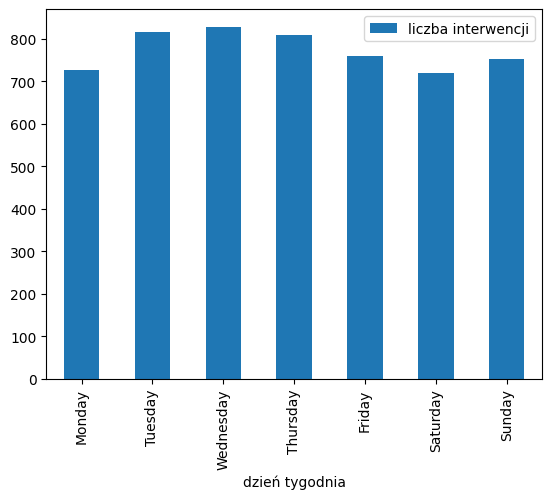

In [191]:
df3.plot.bar(x='day_of_week', y = 'id', label='liczba interwencji', xlabel="dzień tygodnia")


# Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [192]:
populacja_stanow = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)

In [193]:
df_stany = populacja_stanow[0]
df_stany.rename(columns={"State":"state"}, inplace=True)
df_stany.head()

,"Rank in states & territories, 2019","Rank in states & territories, 2010",state,"Population estimate, July 1, 2019 [2]","Census population, April 1, 2010 [3]","Percent change, 2010–2019 [note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019 [note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018 [note 3]"
0,1.0,1.0,California,39512223,37254523,6.1%,+2257700,53,718404,745514,702885,11.96%
1,2.0,2.0,Texas,28995881,25145561,15.3%,+3850320,36,763050,805441,698503,8.68%
2,3.0,3.0,New York,21477737,18801310,14.2%,+2676427,27,740611,795472,696468,6.44%
3,4.0,4.0,Florida,19453561,19378102,0.4%,+75459,27,670812,720502,717707,5.91%
4,5.0,5.0,Illinois,12801989,12702379,0.8%,+99610,18,640099,711222,705715,3.87%


In [164]:
skroty_stanow = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)

In [194]:
df_skroty = skroty_stanow[0]
df_skroty.head()

,"Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).1","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).2","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).3","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).4","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).5","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO a

In [195]:
df_skroty_ograniczone = df_skroty.iloc[11:80, 0:4]
df_skroty_ograniczone.head()

,"Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).1","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).2","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).3"
11,Alabama,State,US-AL,AL
12,Alaska,State,US-AK,AK
13,Arizona,State,US-AZ,AZ
14,Arkansas,State,US-AR,AR
15,California,State,US-CA,CA


In [196]:
df_skroty_ograniczone.columns = ['state', 'col2', 'col3', 'acronym']
df_skroty_ograniczone.head()

,state,col2,col3,acronym
11,Alabama,State,US-AL,AL
12,Alaska,State,US-AK,AK
13,Arizona,State,US-AZ,AZ
14,Arkansas,State,US-AR,AR
15,California,State,US-CA,CA


In [197]:
df_skroty_ograniczone.drop('col2', axis=1, inplace=True)

In [198]:
df_skroty_ograniczone.drop('col3', axis=1, inplace=True)

In [199]:
df_skroty_ograniczone.dropna(inplace=True)
df_skroty_ograniczone.head()

,state,acronym
11,Alabama,AL
12,Alaska,AK
13,Arizona,AZ
14,Arkansas,AR
15,California,CA


In [200]:
df4=df.pivot_table(values='id',index='state', aggfunc=pd.Series.count)
df4.head()

,id
state,
AK,39
AL,104
AR,83
AZ,254
CA,799


In [201]:
df4.reset_index(inplace=True)
df4.head()

,state,id
0,AK,39
1,AL,104
2,AR,83
3,AZ,254
4,CA,799


In [202]:
df4.rename(columns={"state":"acronym"}, inplace=True)
df4.head()

,acronym,id
0,AK,39
1,AL,104
2,AR,83
3,AZ,254
4,CA,799


In [203]:
df5=pd.merge(df4,df_skroty_ograniczone,how='left',on='acronym')
df5.head()

,acronym,id,state
0,AK,39,Alaska
1,AL,104,Alabama
2,AR,83,Arkansas
3,AZ,254,Arizona
4,CA,799,California


In [204]:
df6=pd.merge(df5, df_stany, how='left', on='state')
df6.head()

,acronym,id,state,"Rank in states & territories, 2019","Rank in states & territories, 2010","Population estimate, July 1, 2019 [2]","Census population, April 1, 2010 [3]","Percent change, 2010–2019 [note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019 [note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018 [note 3]"
0,AK,39,Alaska,49.0,48.0,731545,710231,3.0%,+21314,1,243848,731545,710231,0.22%
1,AL,104,Alabama,24.0,23.0,4903185,4779736,2.6%,+123449,7,544798,700455,682819,1.48%
2,AR,83,Arkansas,34.0,33.0,3017825,2915918,3.5%,+101886,4,502967,754451,728990,0.91%
3,AZ,254,Arizona,14.0,16.0,7278717,6392017,13.9%,+886700,9,661702,808746,710224,2.17%
4,CA,799,California,1.0,1.0,39512223,37254523,6.1%,+2257700,53,718404,745514,702885,11.96%


In [205]:
df6['int_per_ths'] = df6.apply(lambda row: row['id']/(row['Population estimate, July 1, 2019 [2]']/1000),axis=1)
df6.head()

,acronym,id,state,"Rank in states & territories, 2019","Rank in states & territories, 2010","Population estimate, July 1, 2019 [2]","Census population, April 1, 2010 [3]","Percent change, 2010–2019 [note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019 [note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018 [note 3]",int_per_ths
0,AK,39,Alaska,49.0,48.0,731545,710231,3.0%,+21314,1,243848,731545,710231,0.22%,0.053312
1,AL,104,Alabama,24.0,23.0,4903185,4779736,2.6%,+123449,7,544798,700455,682819,1.48%,0.021211
2,AR,83,Arkansas,34.0,33.0,3017825,2915918,3.5%,+101886,4,502967,754451,728990,0.91%,0.027503
3,AZ,254,Arizona,14.0,16.0,7278717,6392017,13.9%,+886700,9,661702,808746,710224,2.17%,0.034896
4,CA,799,California,1.0,1.0,39512223,37254523,6.1%,+2257700,53,718404,745514,702885,11.96%,0.020222
